# Importing libraries

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [3]:
X_test.shape[1:]

(32, 32, 3)

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index][0]])

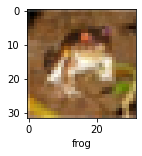

In [6]:
plot_sample(X_train, Y_train, 0)

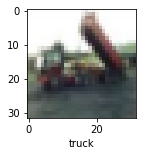

In [7]:
plot_sample(X_train, Y_train, 2)

# Preprocessing

In [8]:
X_train = X_train / 255
X_test = X_test / 255

# 1. CNN with SGD

In [42]:
sgd = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', 
                  padding='same', input_shape=(X_train.shape[1:])),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax'),
])

opt = optimizers.SGD(lr=0.001, momentum=0.9)
sgd.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

filepath_sgd = "models/sgd-model-{epoch:03d}-{val_acc:.2f}.h5"
sgd_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=filepath_sgd,
    save_weights_only=False,
    monitor='val_acc',
    mode='auto',
    save_freq='epoch',
    save_best_only=True)

sgd.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 8, 8, 64)        

In [46]:
sgd_history = sgd.fit(X_train, Y_train, epochs=50, callbacks=[sgd_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 95s 2ms/sample - loss: 2.2406 - acc: 0.1537 - val_loss: 2.1214 - val_acc: 0.2718
Epoch 2/50
45000/45000 [==============================] - 95s 2ms/sample - loss: 2.0028 - acc: 0.2468 - val_loss: 1.8708 - val_acc: 0.3150
Epoch 3/50
45000/45000 [==============================] - 100s 2ms/sample - loss: 1.8403 - acc: 0.3090 - val_loss: 1.7207 - val_acc: 0.3610
Epoch 4/50
45000/45000 [==============================] - 101s 2ms/sample - loss: 1.7340 - acc: 0.3482 - val_loss: 1.6617 - val_acc: 0.3958
Epoch 5/50
45000/45000 [==============================] - 99s 2ms/sample - loss: 1.6530 - acc: 0.3824 - val_loss: 1.6443 - val_acc: 0.4128
Epoch 6/50
45000/45000 [==============================] - 100s 2ms/sample - loss: 1.5907 - acc: 0.4100 - val_loss: 1.4801 - val_acc: 0.4738
Epoch 7/50
45000/45000 [==============================] - 99s 2ms/sample - loss: 1.5376 - acc: 0.4311 - val_loss: 

In [49]:
sgd_history = sgd.fit(X_train, Y_train, epochs=50, callbacks=[sgd_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.8104 - acc: 0.7150 - val_loss: 0.6908 - val_acc: 0.7570
Epoch 2/50
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.8010 - acc: 0.7169 - val_loss: 0.6681 - val_acc: 0.7638
Epoch 3/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 0.7920 - acc: 0.7225 - val_loss: 0.6617 - val_acc: 0.7712
Epoch 4/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 0.7861 - acc: 0.7241 - val_loss: 0.6624 - val_acc: 0.7682
Epoch 5/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 0.7806 - acc: 0.7271 - val_loss: 0.6902 - val_acc: 0.7582
Epoch 6/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 0.7793 - acc: 0.7283 - val_loss: 0.6472 - val_acc: 0.7702
Epoch 7/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 0.7712 - acc: 0.7294 - val_loss: 0.7

In [53]:
filepath = 'models/sgd_100.h5'
sgd.save(filepath)

In [56]:
Y_pred = sgd.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification report:\n', classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1000
           1       0.93      0.90      0.91      1000
           2       0.70      0.68      0.69      1000
           3       0.64      0.63      0.64      1000
           4       0.74      0.81      0.77      1000
           5       0.80      0.62      0.70      1000
           6       0.72      0.93      0.81      1000
           7       0.92      0.78      0.84      1000
           8       0.85      0.93      0.89      1000
           9       0.86      0.90      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [58]:
sgd.evaluate(X_test, Y_test)

10000/10000 [==============================] - 9s 906us/sample - loss: 0.5961 - acc: 0.7967


[0.5960522455215455, 0.7967]

# 2. CNN with RMSprop

## 2.1 RMSprop with momentum

In [59]:
rms = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', 
                  padding='same', input_shape=(X_train.shape[1:])),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax'),
])

opt = optimizers.RMSprop(lr=0.001, rho=0.9, momentum=0.9)
rms.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

filepath_rms = "models/rms-model-{epoch:03d}-{val_acc:.2f}.h5"
rms_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=filepath_rms,
    save_weights_only=False,
    monitor='val_acc',
    mode='auto',
    save_freq='epoch',
    save_best_only=True)

rms.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 8, 8, 64)        

In [60]:
rms_history = rms.fit(X_train, Y_train, epochs=50, callbacks=[rms_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 98s 2ms/sample - loss: 2.0056 - acc: 0.2478 - val_loss: 1.8769 - val_acc: 0.2802
Epoch 2/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 1.9077 - acc: 0.2924 - val_loss: 1.8948 - val_acc: 0.2800
Epoch 3/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 1.9299 - acc: 0.2864 - val_loss: 1.9779 - val_acc: 0.2742
Epoch 4/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 1.9432 - acc: 0.2739 - val_loss: 1.8601 - val_acc: 0.2950
Epoch 5/50
45000/45000 [==============================] - 97s 2ms/sample - loss: 1.9503 - acc: 0.2690 - val_loss: 1.8354 - val_acc: 0.3022
Epoch 6/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 1.9407 - acc: 0.2709 - val_loss: 1.8654 - val_acc: 0.3090
Epoch 7/50
45000/45000 [==============================] - 96s 2ms/sample - loss: 1.9430 - acc: 0.2726 - val_loss: 1.7

KeyboardInterrupt: 

## 2.2 RMSprop with smaller learning rate due to oscilation

In [20]:
rms = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', 
                  padding='same', input_shape=(X_train.shape[1:])),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax'),
])

opt = optimizers.RMSprop(lr=0.0001, rho=0.9, momentum=0.9)
rms.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

filepath_rms = "models/rms-model-{epoch:03d}-{val_acc:.2f}.h5"
rms_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=filepath_rms,
    save_weights_only=False,
    monitor='val_acc',
    mode='auto',
    save_freq='epoch',
    save_best_only=True)

rms.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)         

In [21]:
rms_history = rms.fit(X_train, Y_train, epochs=50, callbacks=[rms_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 100s 2ms/sample - loss: 1.7878 - acc: 0.3422 - val_loss: 1.3821 - val_acc: 0.4944
Epoch 2/50
45000/45000 [==============================] - 98s 2ms/sample - loss: 1.3660 - acc: 0.5093 - val_loss: 1.0885 - val_acc: 0.6198
Epoch 3/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.1931 - acc: 0.5820 - val_loss: 0.9796 - val_acc: 0.6594
Epoch 4/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.0777 - acc: 0.6248 - val_loss: 0.8613 - val_acc: 0.6976
Epoch 5/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.9972 - acc: 0.6550 - val_loss: 0.8543 - val_acc: 0.7062
Epoch 6/50
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9542 - acc: 0.6746 - val_loss: 0.7824 - val_acc: 0.7308
Epoch 7/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.9276 - acc: 0.6838 - val_loss: 0.

KeyboardInterrupt: 

In [25]:
filepath = 'models/rms_35_wm_il.h5'
rms.save(filepath)

## 2.3 RMSprop with 0 momentum

In [10]:
rms = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', 
                  padding='same', input_shape=(X_train.shape[1:])),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax'),
])

opt = optimizers.RMSprop(lr=0.001, rho=0.9, momentum=0.0)
rms.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

filepath_rms = "models/rms-model-{epoch:03d}-{val_acc:.2f}.h5"
rms_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=filepath_rms,
    save_weights_only=False,
    monitor='val_acc',
    mode='auto',
    save_freq='epoch',
    save_best_only=True)

rms.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0

In [28]:
rms_history = rms.fit(X_train, Y_train, epochs=5, callbacks=[rms_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.7173 - acc: 0.3778 - val_loss: 1.5215 - val_acc: 0.4216
Epoch 2/5
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.2958 - acc: 0.5426 - val_loss: 1.1092 - val_acc: 0.6048
Epoch 3/5
45000/45000 [==============================] - 95s 2ms/sample - loss: 1.1187 - acc: 0.6120 - val_loss: 0.8531 - val_acc: 0.7000
Epoch 4/5
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.0200 - acc: 0.6477 - val_loss: 0.9412 - val_acc: 0.6882
Epoch 5/5
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9676 - acc: 0.6716 - val_loss: 0.8333 - val_acc: 0.7100


In [29]:
rms_history = rms.fit(X_train, Y_train, epochs=10, callbacks=[rms_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.9427 - acc: 0.6828 - val_loss: 0.8696 - val_acc: 0.7018
Epoch 2/10
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.9208 - acc: 0.6876 - val_loss: 0.9149 - val_acc: 0.6930
Epoch 3/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9112 - acc: 0.6932 - val_loss: 0.7967 - val_acc: 0.7362
Epoch 4/10
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.9179 - acc: 0.6944 - val_loss: 0.8630 - val_acc: 0.7160
Epoch 5/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9116 - acc: 0.6999 - val_loss: 0.7557 - val_acc: 0.7382
Epoch 6/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9044 - acc: 0.6981 - val_loss: 0.8478 - val_acc: 0.7270
Epoch 7/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9130 - acc: 0.6996 - val_loss: 0.9

In [30]:
filepath = 'models/rms_15_l.h5'
rms.save(filepath)

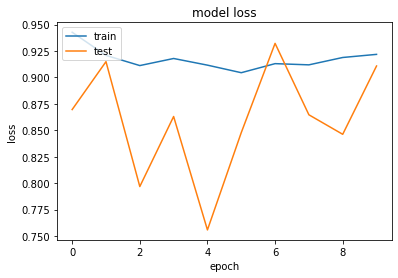

In [31]:
plt.plot(rms_history.history['loss'])
plt.plot(rms_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
rms = models.load_model('models/rms_15_l.h5')

In [14]:
rms_history = rms.fit(X_train, Y_train, epochs=5, callbacks=[rms_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9292 - acc: 0.6965 - val_loss: 1.0540 - val_acc: 0.6828
Epoch 2/5
45000/45000 [==============================] - 98s 2ms/sample - loss: 0.9294 - acc: 0.6961 - val_loss: 0.8951 - val_acc: 0.7042
Epoch 3/5
45000/45000 [==============================] - 98s 2ms/sample - loss: 0.9374 - acc: 0.6961 - val_loss: 0.9777 - val_acc: 0.6640
Epoch 4/5
45000/45000 [==============================] - 98s 2ms/sample - loss: 0.9473 - acc: 0.6934 - val_loss: 0.8952 - val_acc: 0.7104
Epoch 5/5
45000/45000 [==============================] - 184s 4ms/sample - loss: 0.9614 - acc: 0.6877 - val_loss: 0.9319 - val_acc: 0.7168


In [15]:
rms.evaluate(X_test, Y_test)

10000/10000 [==============================] - 12s 1ms/sample - loss: 0.9844 - acc: 0.6964


[0.9843933242797852, 0.6964]

In [16]:
Y_pred = rms.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification report:\n', classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1000
           1       0.90      0.82      0.86      1000
           2       0.65      0.48      0.55      1000
           3       0.59      0.40      0.47      1000
           4       0.52      0.80      0.63      1000
           5       0.82      0.42      0.55      1000
           6       0.60      0.92      0.72      1000
           7       0.79      0.72      0.75      1000
           8       0.76      0.88      0.81      1000
           9       0.74      0.90      0.81      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



# 3. CNN with Adam

In [13]:
adam = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', 
                  padding='same', input_shape=(X_train.shape[1:])),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax'),
])

opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
adam.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

filepath_adam = "models/adam-model-{epoch:03d}-{val_acc:.2f}.h5"
adam_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=filepath_adam,
    save_weights_only=False,
    monitor='val_acc',
    mode='auto',
    save_freq='epoch',
    save_best_only=True)

adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0

In [ ]:
adam_history = adam.fit(X_train, Y_train, epochs=50, callbacks=[adam_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 101s 2ms/sample - loss: 1.8114 - acc: 0.3261 - val_loss: 1.3854 - val_acc: 0.4944
Epoch 2/50
45000/45000 [==============================] - 98s 2ms/sample - loss: 1.3865 - acc: 0.4981 - val_loss: 1.1904 - val_acc: 0.5710
Epoch 3/50
45000/45000 [==============================] - 99s 2ms/sample - loss: 1.2001 - acc: 0.5724 - val_loss: 0.9868 - val_acc: 0.6556
Epoch 4/50
45000/45000 [==============================] - 97s 2ms/sample - loss: 1.0913 - acc: 0.6172 - val_loss: 0.8978 - val_acc: 0.6770
Epoch 5/50
45000/45000 [==============================] - 97s 2ms/sample - loss: 1.0084 - acc: 0.6490 - val_loss: 0.8026 - val_acc: 0.7222
Epoch 6/50
45000/45000 [==============================] - 98s 2ms/sample - loss: 0.9417 - acc: 0.6673 - val_loss: 0.7964 - val_acc: 0.7122
Epoch 7/50
45000/45000 [==============================] - 98s 2ms/sample - loss: 0.8943 - acc: 0.6883 - val_loss: 0.

In [3]:
adam = models.load_model('models/adam-model-023-0.82.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
adam_history = adam.fit(X_train, Y_train, epochs=50, callbacks=[adam_checkpoint_callback], batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.8076 - acc: 0.3319 - val_loss: 1.4344 - val_acc: 0.4804
Epoch 2/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.3970 - acc: 0.4920 - val_loss: 1.1919 - val_acc: 0.5682
Epoch 3/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.2221 - acc: 0.5652 - val_loss: 0.9924 - val_acc: 0.6504
Epoch 4/50
45000/45000 [==============================] - 93s 2ms/sample - loss: 1.0846 - acc: 0.6172 - val_loss: 0.8613 - val_acc: 0.6946
Epoch 5/50
45000/45000 [==============================] - 93s 2ms/sample - loss: 1.0043 - acc: 0.6475 - val_loss: 0.8051 - val_acc: 0.7188
Epoch 6/50
45000/45000 [==============================] - 93s 2ms/sample - loss: 0.9319 - acc: 0.6719 - val_loss: 0.8236 - val_acc: 0.7118
Epoch 7/50
45000/45000 [==============================] - 93s 2ms/sample - loss: 0.8837 - acc: 0.6936 - val_loss: 0.7

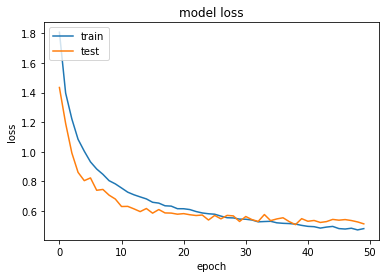

In [15]:
plt.plot(adam_history.history['loss'])
plt.plot(adam_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
adam.evaluate(X_test, Y_test)

10000/10000 [==============================] - 6s 569us/sample - loss: 0.5679 - acc: 0.8189


[0.5678636559963226, 0.8189]

In [18]:
Y_pred = adam.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification report:\n', classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.90      0.92      0.91      1000
           2       0.77      0.72      0.74      1000
           3       0.65      0.69      0.67      1000
           4       0.76      0.84      0.80      1000
           5       0.75      0.72      0.73      1000
           6       0.84      0.86      0.85      1000
           7       0.90      0.83      0.86      1000
           8       0.87      0.93      0.90      1000
           9       0.91      0.88      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [19]:
filepath = 'models/adam_75.h5'
adam.save(filepath)